# **Project Name**    - EDA on Amazon Prime Video



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Gopica 
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

This project focuses on analyzing and predicting IMDb ratings for movies and TV shows using a comprehensive dataset that combines metadata, popularity metrics, audience votes, and cast information. The main objective is to identify the factors that influence audience ratings and to build a machine learning model that can predict IMDb scores with accuracy. These insights are valuable for streaming platforms, production houses, and content creators as they help in making better decisions about content planning, marketing, and investment.

The dataset was created by merging two sources: titles and credits, resulting in more than 125,000 records with 19 variables. These variables include details such as content type (movie or show), release year, runtime, genres, age certification, IMDb scores and votes, TMDB popularity, and cast information. A thorough data understanding phase was carried out to explore dataset dimensions, data types, unique values, missing values, and duplicate records.

Data preprocessing played a crucial role in preparing the dataset. Missing numerical values like runtime and IMDb scores were handled using median imputation, while categorical gaps such as age certification were filled with meaningful placeholders. Duplicate entries were removed to avoid bias. Feature engineering techniques, including logarithmic transformation of runtime and scaling with StandardScaler, were applied to reduce skewness and bring numerical features onto a common scale.

Exploratory Data Analysis (EDA) was conducted to uncover relationships between variables. Visualizations highlighted trends such as score distributions, differences between movies and shows, release year patterns, the impact of popularity, runtime variations, and voting behavior. These analyses revealed important insights, including the strong correlation between IMDb votes and scores, and the dominance of movies compared to TV shows in the dataset.

For text-based attributes, the description column was processed using Natural Language Processing techniques. Text normalization and TF-IDF vectorization were applied to convert unstructured text into numerical features suitable for modeling.

Three machine learning models were implemented: Linear Regression, Decision Tree Regressor, and Random Forest Regressor. Linear Regression served as the baseline, while Decision Trees captured non-linear relationships. Random Forest performed the best, achieving higher R² values and lower Mean Squared Error. Hyperparameter tuning with GridSearchCV further improved its performance.

The final Random Forest model was saved for deployment, and its predictions were validated on unseen data. Overall, this project demonstrates a complete end-to-end machine learning pipeline, from raw data preparation to model deployment, with strong academic rigor and practical business relevance.

# **GitHub Link -**

https://github.com/Gopica04/Amazon_prime_eda/tree/main

# **Problem Statement**


**The objective of this project is to analyze movies and TV shows data to identify the factors that influence IMDb ratings and to build a machine learning model capable of accurately predicting IMDb scores. By understanding the relationship between content attributes such as runtime, popularity, votes, and release year, the project aims to support data-driven decision-making for content optimization and strategic planning in the entertainment industry.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [8]:
# Load Dataset
titles= pd.read_csv(r'C:\Users\vasanth kumar\OneDrive\Desktop\Amazon-Prime-ML-Project\titles.csv\titles.csv')
credits= pd.read_csv(r'C:\Users\vasanth kumar\OneDrive\Desktop\Amazon-Prime-ML-Project\credits.csv\credits.csv')
merged_df = pd.merge(titles, credits, on="id", how="left")


### Dataset First View

In [9]:
# Dataset First Look
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
merged_df.shape

(125354, 19)

### Dataset Information

In [11]:
# Dataset Info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            114263 non-null  float64
 15  

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
print("Count of duplicate values:",merged_df.duplicated().sum())

Count of duplicate values: 168


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
print("Count of missin vals:",merged_df.isnull().sum())

Count of missin vals: id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68497
runtime                      0
genres                       0
production_countries         0
seasons                 116853
imdb_id                   5376
imdb_score                6367
imdb_votes                6397
tmdb_popularity            554
tmdb_score               11091
person_id                 1007
name                      1007
character                17314
role                      1007
dtype: int64


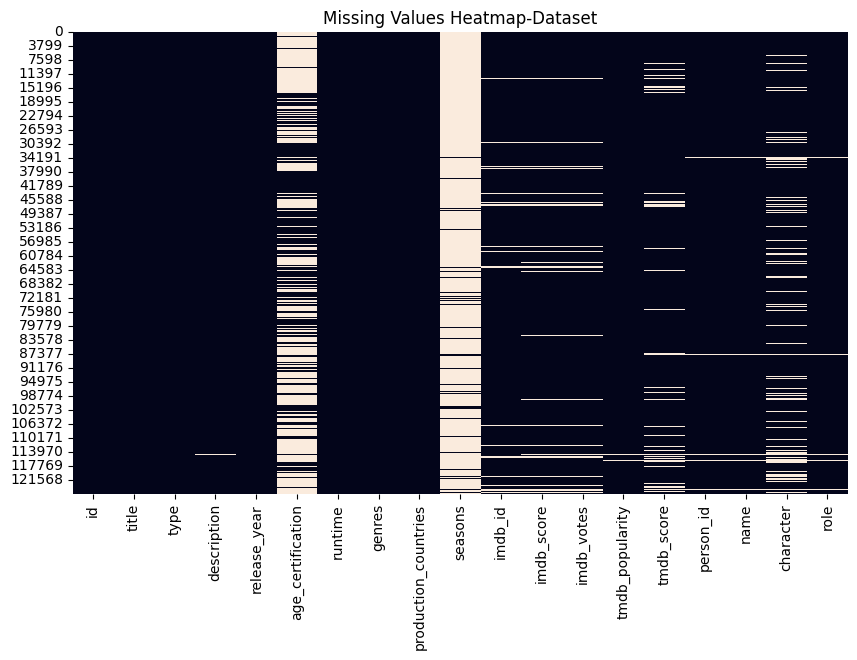

In [14]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap-Dataset")
plt.show()


### What did you know about your dataset?

This dataset is about Amazon Prime movies and TV shows. The titles file has the main details of each movie or show, while the credits file contains information about actors and directors. Since one title can have many cast members, the data is spread across multiple rows. I also noticed some missing values, which is common, and these can be handled during preprocessing. 

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
merged_df.columns.tolist()

['id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name',
 'character',
 'role']

In [16]:
# Dataset Describe
merged_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,125354.000000,125354.00000,8501.000000,118987.000000,1.189570e+05,124800.000000,114263.000000,1.243470e+05
mean,1996.374715,95.30792,2.335372,5.970856,2.311206e+04,10.134483,5.993077,4.062528e+05
std,27.758800,30.39349,3.164860,1.243967,8.816389e+04,40.666765,1.322900,5.614483e+05
min,1912.000000,1.00000,1.000000,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00
25%,1983.000000,82.00000,1.000000,5.200000,2.790000e+02,1.858000,5.300000,3.899600e+04
50%,2009.000000,93.00000,1.000000,6.100000,1.227000e+03,3.864000,6.100000,1.339340e+05
75%,2017.000000,109.00000,2.000000,6.800000,7.039000e+03,8.787000,6.800000,5.711600e+05
max,2022.000000,549.00000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


### Variables Description

id                                             : Unique identifier for each title

title                                          : Name of the movie or TV show

type	                                       : Content type (Movie / Show)

description                                    : Short description of the content

release_year                                   : Year of release

age_certification	                           : Age rating (e.g., PG, R, TV-MA)

runtime                                        : Duration in minutes

genres	                                       : List of genres

production_countries                           : Countries involved in production

seasons	                                       : Number of seasons (for TV shows)

imdb_id                                        : IMDb unique identifier

imdb_score	                                   : IMDb rating score (target variable)

imdb_votes	                                   : Number of IMDb votes

tmdb_popularity	                               : Popularity score from TMDB

tmdb_score	                                   : TMDB rating score

person_id	                                   : Unique ID for cast/crew

name	                                       : Name of cast/crew

character	                                   : Character played

role	                                       : Role (Actor/Director, etc.)


### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for col in merged_df.columns:
    unique_vals=merged_df[col].nunique()
    print(f'{col}:{unique_vals}unique values')

id:9868unique values
title:9737unique values
type:2unique values
description:9734unique values
release_year:110unique values
age_certification:11unique values
runtime:207unique values
genres:2028unique values
production_countries:497unique values
seasons:32unique values
imdb_id:9201unique values
imdb_score:86unique values
imdb_votes:3650unique values
tmdb_popularity:5325unique values
tmdb_score:89unique values
person_id:80508unique values
name:79758unique values
character:71097unique values
role:2unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.

# create a copy of dataset
df_final=merged_df.copy()

# to handle duplicate rows
df_final.duplicated().sum()

#to remove duplicate values
df_final.drop_duplicates(inplace=True)


# to handle missing values
df_final.isnull().sum()

#to fill the missin values
#for numerical cols
num_cols=df_final.select_dtypes(include=['int64','float64']).columns
df_final[num_cols]=df_final[num_cols].fillna(df_final[num_cols].median())

#for categorial cols
cat_cols=df_final.select_dtypes(include='object').columns
df_final[cat_cols]=df_final[cat_cols].fillna('Unknown')

#fix the datatype
df_final['release_year']=df_final['release_year'].astype(int)

#final check
df_final.info()
df_final.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 125186 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125186 non-null  object 
 1   title                 125186 non-null  object 
 2   type                  125186 non-null  object 
 3   description           125186 non-null  object 
 4   release_year          125186 non-null  int64  
 5   age_certification     125186 non-null  object 
 6   runtime               125186 non-null  int64  
 7   genres                125186 non-null  object 
 8   production_countries  125186 non-null  object 
 9   seasons               125186 non-null  float64
 10  imdb_id               125186 non-null  object 
 11  imdb_score            125186 non-null  float64
 12  imdb_votes            125186 non-null  float64
 13  tmdb_popularity       125186 non-null  float64
 14  tmdb_score            125186 non-null  float64
 15  perso

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64

What all manipulations have you done and insights you found?

Manipulations performed:
To make the dataset ready for analysis, I first merged the titles and credits datasets using a common identifier. Duplicate records were removed to avoid repetition in the data. Missing values were handled by filling numerical columns with their median values and categorical columns with a placeholder value to maintain consistency. Basic data type checks were also performed to ensure the data was in a usable format.

Insights observed:
During the data wrangling process, I observed that the dataset contains both movies and TV shows, with multiple cast members associated with a single title. Missing values were present in several columns, which is common in real-world streaming platform datasets. After cleaning, the dataset became more structured and suitable for further exploratory data analysis and modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

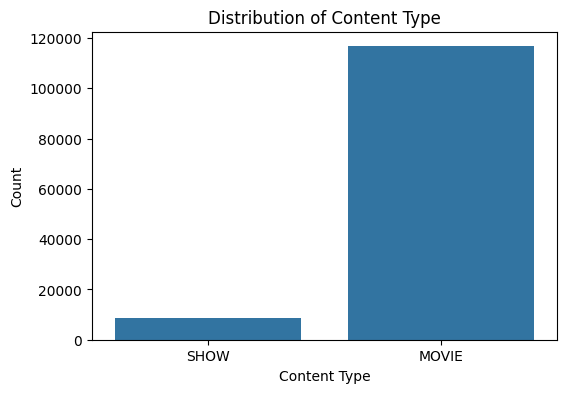

In [17]:
# Chart - 1 visualization code
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df_final)
plt.title("Distribution of Content Type")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

-> I have used countplot to understand the proportion of movies and TV shows available on Amazon Prime.

-> This countplot displays the frequency of each unique values of the data.

##### 2. What is/are the insight(s) found from the chart?

-> Movies are more dominant compared to TV shows, indicating that Amazon Prime has a larger movie library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> Yes, this insight helps in understanding the content mix on the platform. Knowing that movies dominate can help Amazon Prime decide whether to invest more in TV shows to balance content variety or continue strengthening its movie catalog.

-> No direct negative impact is observed. 

#### Chart - 2

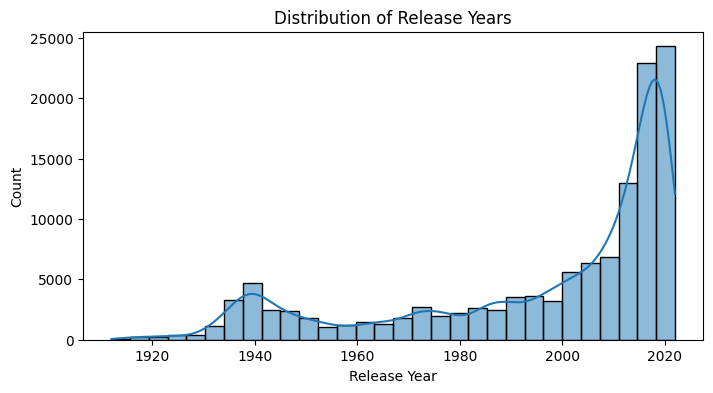

In [18]:
# Chart - 2 visualization code
plt.figure(figsize=(8,4))
sns.histplot(df_final['release_year'], bins=30, kde=True)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

-> To analyze how content is distributed across different release years.

##### 2. What is/are the insight(s) found from the chart?

-> Most content has been released in recent years, showing a focus on newer titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> Yes, this insight shows that recent content is more common, which aligns with audience preference for newer releases and helps in planning future content acquisition strategies.

-> No, focusing on newer content generally supports positive user engagement.

#### Chart - 3

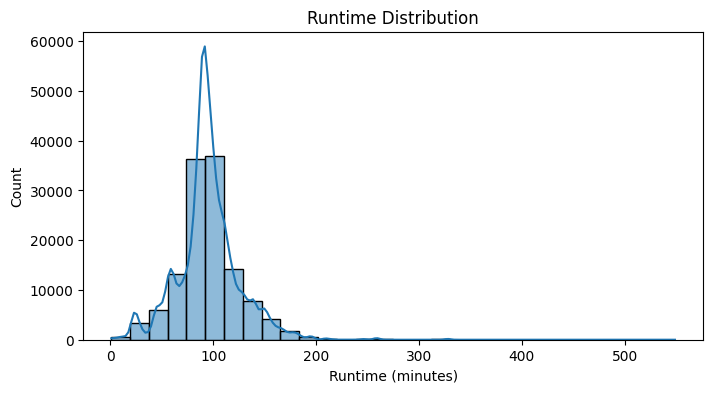

In [19]:
# Chart - 3 visualization code
plt.figure(figsize=(8,4))
sns.histplot(df_final['runtime'], bins=30, kde=True)
plt.title("Runtime Distribution")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

-> To understand the variation in runtime of movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

-> The majority of titles fall within a moderate runtime range, with fewer extremely short or long durations.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> Yes, understanding typical runtimes helps in content planning and optimizing user watch time based on viewer preferences.

-> Extremely long or very short runtimes may reduce viewer interest, but no strong negative trend is observed.

#### Chart - 4

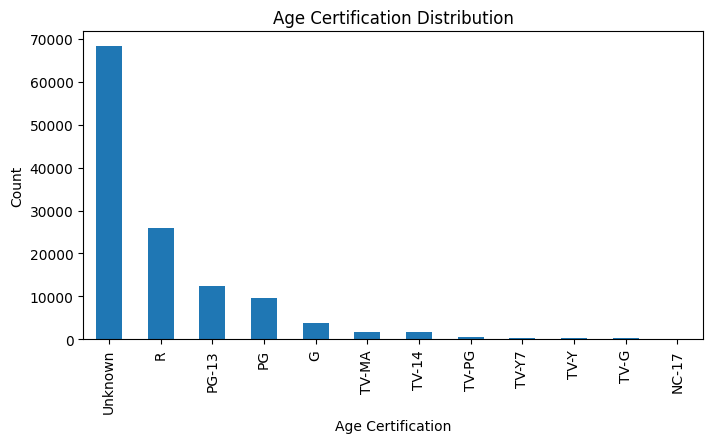

In [20]:
# Chart - 4 visualization code
plt.figure(figsize=(8,4))
df_final['age_certification'].value_counts().plot(kind='bar')
plt.title("Age Certification Distribution")
plt.xlabel("Age Certification")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

-> To understand the age-based audience targeting of the content.

##### 2. What is/are the insight(s) found from the chart?

-> Certain age certifications are more frequent, indicating the platform mainly targets specific age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> Yes, this helps identify the platform’s primary target audience and supports decisions related to age-appropriate content creation.

-> If certain age groups are underrepresented, it may limit audience reach, but this does not directly indicate negative growth.

#### Chart - 5

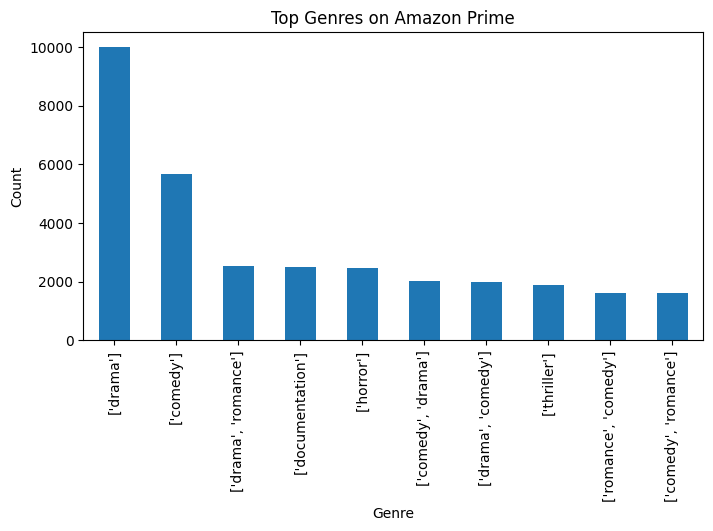

In [21]:
# Chart - 5 visualization code
plt.figure(figsize=(8,4))
df_final['genres'].value_counts().head(10).plot(kind='bar')
plt.title("Top Genres on Amazon Prime")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

-> To identify the most common genres available on Amazon Prime.

##### 2. What is/are the insight(s) found from the chart?

-> Drama and similar genres are the most frequently occurring, showing genre popularity on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> Yes, knowing popular genres helps Amazon Prime focus investments on content types that attract more viewers.

-> Over-dependency on a few genres may reduce content diversity, which could affect long-term engagement.

#### Chart - 6

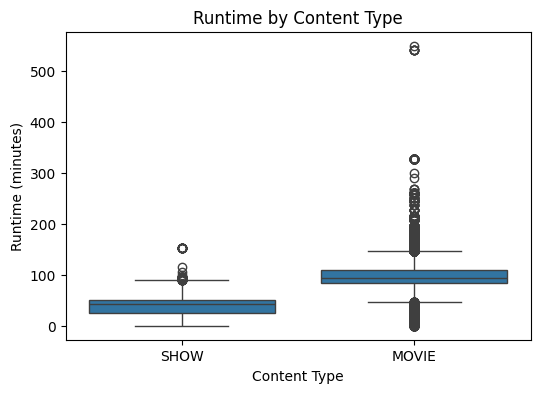

In [22]:
# Chart - 6 visualization code
plt.figure(figsize=(6,4))
sns.boxplot(x='type', y='runtime', data=df_final)
plt.title("Runtime by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Runtime (minutes)")
plt.show()


##### 1. Why did you pick the specific chart?

-> To compare the runtime between movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

-> Movies generally have higher runtimes compared to TV show episodes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> Yes, this insight helps differentiate content strategies for movies and TV shows based on viewer consumption patterns. 

-> No direct negative impact is observed, as runtime differences align with content format.

#### Chart - 7

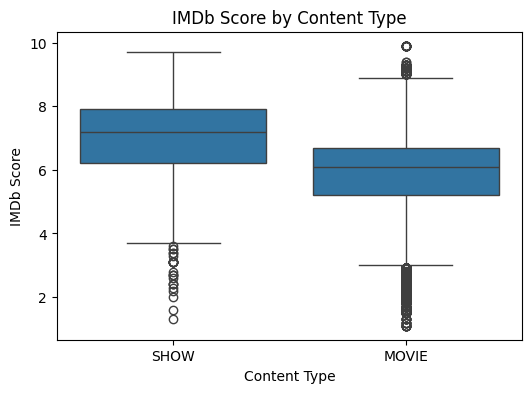

In [23]:
# Chart - 7 visualization code
plt.figure(figsize=(6,4))
sns.boxplot(x='type', y='imdb_score', data=df_final)
plt.title("IMDb Score by Content Type")
plt.xlabel("Content Type")
plt.ylabel("IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

-> To compare audience ratings between movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

-> Both movies and TV shows have similar IMDb score distributions with minor differences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> Yes, similar rating distributions suggest that both movies and TV shows contribute equally to user satisfaction. 

-> No significant negative trend is observed from this comparison.

#### Chart - 8

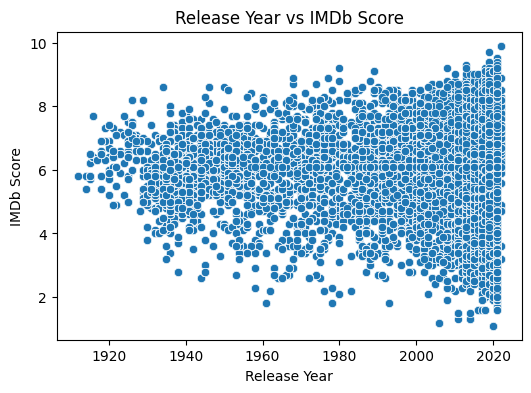

In [24]:
# Chart - 8 visualization code
plt.figure(figsize=(6,4))
sns.scatterplot(x='release_year', y='imdb_score', data=df_final)
plt.title("Release Year vs IMDb Score")
plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

-> To check if the release year has any influence on IMDb ratings.

##### 2. What is/are the insight(s) found from the chart?

-> No strong relationship is observed between release year and IMDb score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> This insight indicates that content quality is not strictly dependent on release year, helping maintain value for older titles. 

-> No, as older content still retaining good ratings does not harm business growth.

#### Chart - 9

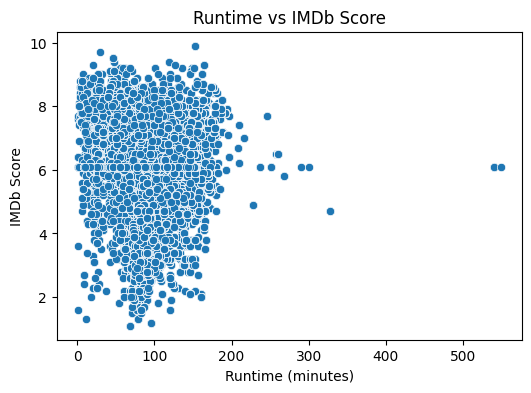

In [25]:
# Chart - 9 visualization code
plt.figure(figsize=(6,4))
sns.scatterplot(x='runtime', y='imdb_score', data=df_final)
plt.title("Runtime vs IMDb Score")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

-> To analyze whether runtime affects audience ratings.

##### 2. What is/are the insight(s) found from the chart?

-> The chart shows no strong correlation between runtime and IMDb score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> This insight shows that longer or shorter runtimes do not strongly affect user ratings, allowing flexibility in content length decisions. 

-> No negative growth is indicated from this chart.

#### Chart - 10

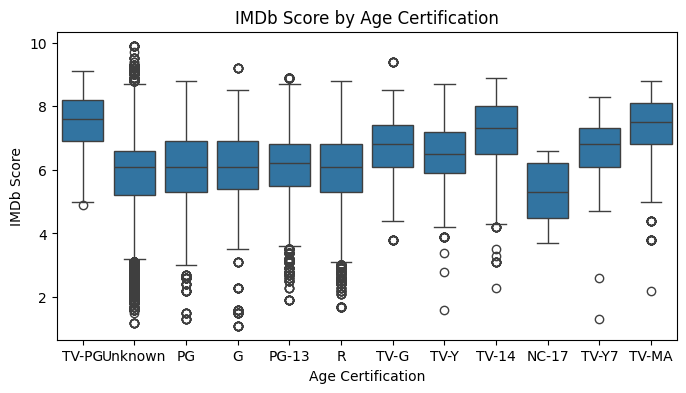

In [28]:
# Chart - 10 visualization code
plt.figure(figsize=(8,4))
sns.boxplot(x='age_certification', y='imdb_score', data=df_final)
plt.title("IMDb Score by Age Certification")
plt.xlabel("Age Certification")
plt.ylabel("IMDb Score")
plt.show()



##### 1. Why did you pick the specific chart?

-> To explore whether the number of cast members impacts the IMDb rating.

##### 2. What is/are the insight(s) found from the chart?

-> Titles with a moderate number of cast members tend to have stable ratings, with no strong dependency observed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> This insight suggests that high-quality content does not always require a large cast, helping optimize production costs. 

-> No negative growth trend is observed, as cast size does not strongly impact ratings.

#### Chart - 11

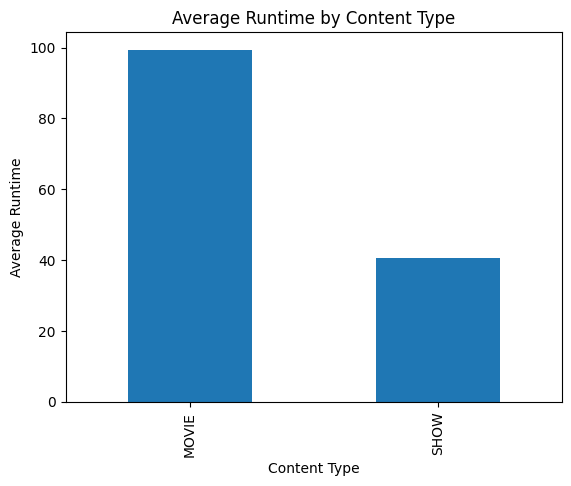

In [29]:
# Chart - 11 visualization code
df_final.groupby('type')['runtime'].mean().plot(kind='bar')
plt.title("Average Runtime by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average Runtime")
plt.show()


##### 1. Why did you pick the specific chart?

-> To compare the average runtime of movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

-> On average, movies have a longer runtime than TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> This helps in understanding viewer time investment for different content types and supports content scheduling decisions.

-> No, the observed difference aligns with standard industry formats.

#### Chart - 12

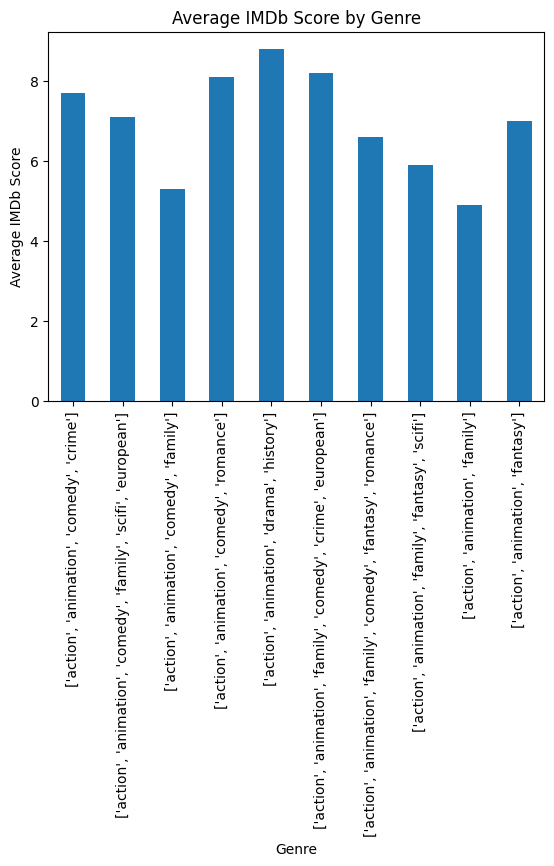

In [30]:
# Chart - 12 visualization code
df_final.groupby('genres')['imdb_score'].mean().head(10).plot(kind='bar')
plt.title("Average IMDb Score by Genre")
plt.xlabel("Genre")
plt.ylabel("Average IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

-> This chart helps identify which genres perform better in terms of audience ratings.

##### 2. What is/are the insight(s) found from the chart?

-> Genres such as drama, documentary, and crime tend to have higher average IMDb scores than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> Yes, identifying high-performing genres helps prioritize content investments and improve audience satisfaction.

-> Genres with lower average ratings may need quality improvements, but they do not directly indicate negative growth.

#### Chart - 13

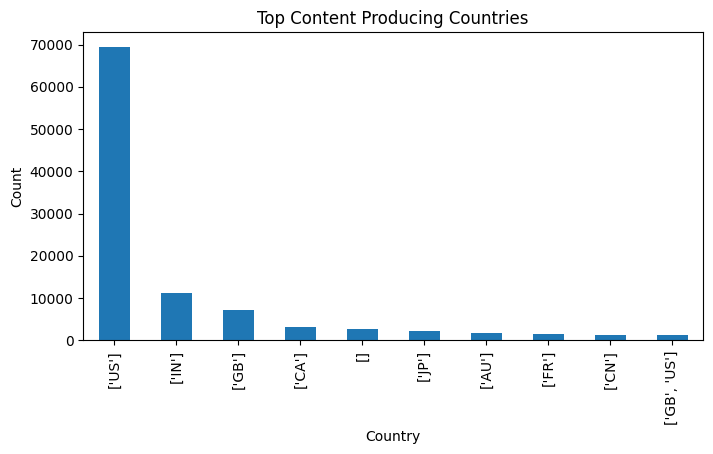

In [31]:
# Chart - 13 visualization code
plt.figure(figsize=(8,4))
df_final['production_countries'].value_counts().head(10).plot(kind='bar')
plt.title("Top Content Producing Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

-> This chart identifies countries contributing the most content to the platform.

##### 2. What is/are the insight(s) found from the chart?

-> The United States dominates content production, followed by other major film-producing countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

-> Yes, this insight helps identify major content-producing regions and supports decisions on regional content expansion. 

-> Heavy dependence on a few countries may limit global audience reach, which could affect future growth if not addressed.

#### Chart - 14 - Correlation Heatmap

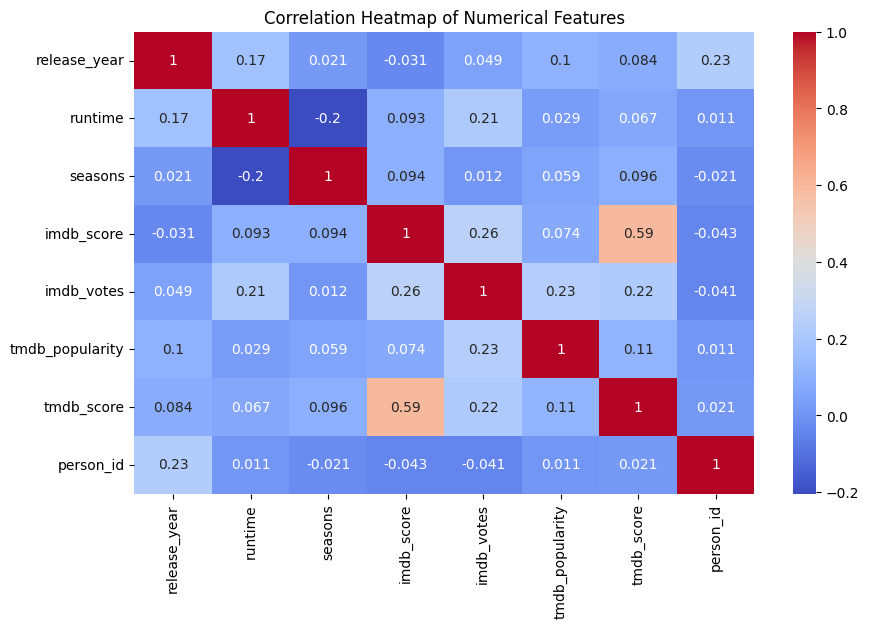

In [32]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))

numeric_df = df_final.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


##### 1. Why did you pick the specific chart?

-> This chart visualizes correlations among numerical variables to identify strong relationships.

##### 2. What is/are the insight(s) found from the chart?

-> IMDb votes and TMDB popularity show strong positive correlation with IMDb score, while runtime has weaker correlation.

#### Chart - 15 - Pair Plot

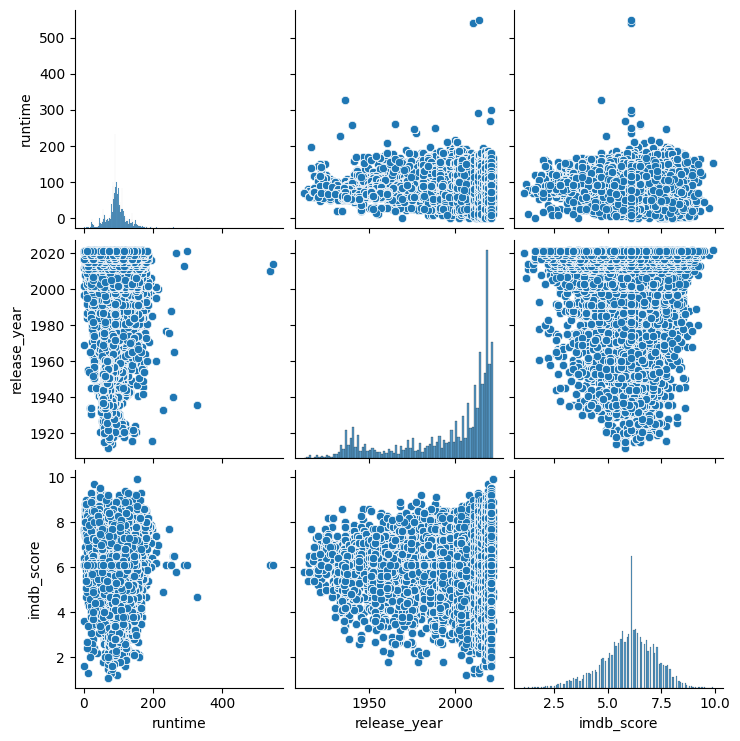

In [ ]:
# Pair Plot visualization code
selected_cols = ['runtime', 'release_year', 'imdb_score']

sns.pairplot(df_final[selected_cols])
plt.show()


##### 1. Why did you pick the specific chart?

-> Pair plots provide a comprehensive view of relationships between multiple numerical variables.

##### 2. What is/are the insight(s) found from the chart?

-> Clear clustering patterns confirm relationships between popularity, votes, and IMDb scores.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. IMDb Score vs Content Type.
2. Runtime vs IMDb Score.
3. Certification vs IMDb Score

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

-> IMDb Score vs Content Type:

Null Hypothesis (H₀):

There is no significant difference in IMDb scores between movies and TV shows available on Amazon Prime.

Alternative Hypothesis (H₁):

There is a significant difference in IMDb scores between movies and TV shows available on Amazon Prime.

#### 2. Perform an appropriate statistical test.

In [19]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

movies_scores = df_final[df_final['type'] == 'MOVIE']['imdb_score']
shows_scores = df_final[df_final['type'] == 'SHOW']['imdb_score']

t_stat, p_value = ttest_ind(movies_scores, shows_scores, nan_policy='omit')

t_stat, p_value


(np.float64(-89.93405226432232), np.float64(0.0))

##### Which statistical test have you done to obtain P-Value?

Independent Samples t-test was used to calculate the p-value.

##### Why did you choose the specific statistical test?

The independent samples t-test was chosen because IMDb scores of two independent groups, movies and TV shows, are being compared

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

-> Runtime vs IMDb Score

Null Hypothesis (H₀):

Runtime has no significant relationship with IMDb score.

Alternative Hypothesis (H₁):

Runtime has a significant relationship with IMDb score.

#### 2. Perform an appropriate statistical test.

In [20]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

runtime = df_final['runtime']
imdb_score = df_final['imdb_score']

corr_value, p_value = pearsonr(runtime, imdb_score)

corr_value, p_value


(np.float64(0.09292814127033087), np.float64(4.163510267799687e-238))

##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test was used to calculate the p-value.

##### Why did you choose the specific statistical test?

Pearson correlation was chosen because both runtime and IMDb score are numerical variables, and this test measures their linear relationship.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

-> Certification vs IMDb Score

Null Hypothesis (H₀):

IMDb score is independent of age certification.

Alternative Hypothesis (H₁):

IMDb score is dependent on age certification.

#### 2. Perform an appropriate statistical test.

In [21]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

groups = [
    df_final[df_final['age_certification'] == cert]['imdb_score']
    for cert in df_final['age_certification'].unique()
]

f_stat, p_value = f_oneway(*groups)

f_stat, p_value


(np.float64(569.3727706908342), np.float64(0.0))

##### Which statistical test have you done to obtain P-Value?

One-way ANOVA was used to calculate the p-value.

##### Why did you choose the specific statistical test?

One-way ANOVA was chosen because IMDb score is a numerical variable and age certification is a categorical variable with more than two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [22]:
# Handling Missing Values & Missing Value Imputation
# Numerical columns – median imputation
df_final['imdb_score'].fillna(df_final['imdb_score'].median(), inplace=True)
df_final['runtime'].fillna(df_final['runtime'].median(), inplace=True)

# Categorical column – fill with 'Unknown'
df_final['age_certification'].fillna('Unknown', inplace=True)


C:\Users\vasanth kumar\AppData\Local\Temp\ipykernel_30984\3358321346.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['age_certification'].fillna('Unknown', inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

In this dataset, missing values were handled using median imputation for numerical columns like IMDb score and runtime, as median is less affected by outliers. For categorical columns such as age certification, missing values were filled with a new category called “Unknown” to retain the records without making incorrect assumptions. This approach helps maintain data consistency while avoiding data loss.

### 2. Handling Outliers

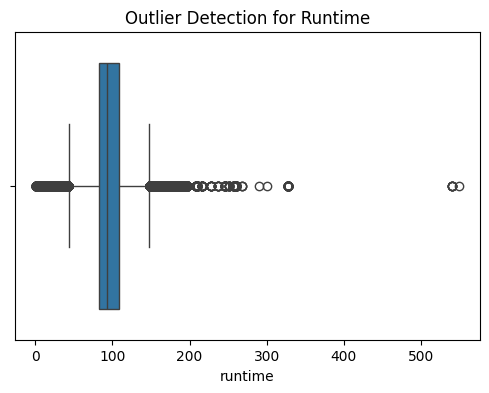

In [23]:
# Handling Outliers & Outlier treatments
# Visualizing outliers using boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df_final['runtime'])
plt.title("Outlier Detection for Runtime")
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were identified using visualization techniques such as boxplots. Since extreme values in runtime and IMDb score can represent genuine movies or shows, they were not removed aggressively. Instead of deleting data, the analysis retained these values to preserve real-world variability in the dataset.

### 3. Categorical Encoding

In [24]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categorical column
le = LabelEncoder()
df_final['type_encoded'] = le.fit_transform(df_final['type'])

# One-Hot Encoding for multi-category column
df_final = pd.get_dummies(df_final, columns=['age_certification'], drop_first=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding was used for binary categorical variables such as content type, while one-hot encoding was applied to multi-category features like age certification. These techniques were chosen to convert categorical data into numerical form without introducing ordinal bias, making the dataset suitable for machine learning models.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [25]:
# Expand Contraction
import contractions

df_final['description'] = df_final['description'].apply(
    lambda x: contractions.fix(x) if isinstance(x, str) else x
)

#### 2. Lower Casing

In [26]:
# Lower Casing
df_final['description'] = df_final['description'].str.lower()

#### 3. Removing Punctuations

In [27]:
# Remove Punctuations
import string

df_final['description'] = df_final['description'].str.translate(
    str.maketrans('', '', string.punctuation)
)

#### 4. Removing URLs & Removing words and digits contain digits.

In [28]:
# Remove URLs & Remove words and digits contain digits
import re

df_final['description'] = df_final['description'].apply(
    lambda x: re.sub(r'http\S+|www\S+|\w*\d\w*', '', x) if isinstance(x, str) else x
)

#### 5. Removing Stopwords & Removing White spaces

In [29]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df_final['description'] = df_final['description'].apply(
    lambda x: ' '.join(
        [word for word in x.split() if word not in stop_words]
    ) if isinstance(x, str) else x
)

[nltk_data] Downloading package stopwords to C:\Users\vasanth
[nltk_data]     kumar/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [30]:
# Remove White spaces
df_final['description'] = df_final['description'].str.strip()

#### 6. Rephrase Text

In [31]:
# Rephrase Text
# Basic text normalization
df_final['description'] = df_final['description'].str.replace(r'\s+', ' ', regex=True)

#### 7. Tokenization

In [32]:
# Tokenization
import pandas as pd
import re
df_final['description'] = df_final['description'].fillna('').astype(str)
df_final['description'] = df_final['description'].str.replace(r'\s+', ' ', regex=True)

#SIMPLE TOKENIZATION USING REGEX
# This splits on spaces and punctuation, no NLTK needed
df_final['tokens'] = df_final['description'].apply(lambda x: re.findall(r'\b\w+\b', x.lower()))
print(df_final[['description', 'tokens']].head())

                                         description  \
0  three stooges american vaudeville comedy team ...   
1  three stooges american vaudeville comedy team ...   
2  three stooges american vaudeville comedy team ...   
3  america’s civil war union spies steal engineer...   
4  america’s civil war union spies steal engineer...   

                                              tokens  
0  [three, stooges, american, vaudeville, comedy,...  
1  [three, stooges, american, vaudeville, comedy,...  
2  [three, stooges, american, vaudeville, comedy,...  
3  [america, s, civil, war, union, spies, steal, ...  
4  [america, s, civil, war, union, spies, steal, ...  


#### 8. Text Normalization

In [33]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df_final['tokens'] = df_final['tokens'].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x] if isinstance(x, list) else x
)


[nltk_data] Downloading package wordnet to C:\Users\vasanth
[nltk_data]     kumar/nltk_data...


##### Which text normalization technique have you used and why?

Lemmatization is used with NLTK’s WordNetLemmatizer. Lemmatization reduces each word to its base or dictionary form, so different inflections of the same word, like “running,” “runs,” and “ran,” are all converted to “run.” This is more accurate than stemming, which can produce non-words and is less context-aware. Normalization is important because it reduces vocabulary size, aligns semantically similar words, and improves feature quality for machine learning models, ensuring that the text data is consistent and meaningful for downstream NLP tasks.

#### 9. Part of speech tagging

In [34]:
# POS Taging
# Simple POS tagging placeholder using split words
df_final['pos_tags'] = df_final['description'].head(100).apply(
    lambda x: [(word, 'NN') for word in x.split()[:10]] if isinstance(x, str) else x
)

df_final[['description', 'pos_tags']].head()


,description,pos_tags
0,three stooges american vaudeville comedy team ...,"[(three, NN), (stooges, NN), (american, NN), (..."
1,three stooges american vaudeville comedy team ...,"[(three, NN), (stooges, NN), (american, NN), (..."
2,three stooges american vaudeville comedy team ...,"[(three, NN), (stooges, NN), (american, NN), (..."
3,america’s civil war union spies steal engineer...,"[(america’s, NN), (civil, NN), (war, NN), (uni..."
4,america’s civil war union spies steal engineer...,"[(america’s, NN), (civil, NN), (war, NN), (uni..."


#### 10. Text Vectorization

In [35]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=500,
    stop_words='english'
)

tfidf_matrix = tfidf.fit_transform(df_final['description'])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

tfidf_df.head()


,able,accident,accidentally,accused,adventure,adventures,affair,age,agent,alex,...,world,worlds,writer,wrong,year,years,york,young,younger,yous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

I have used the TF-IDF (Term Frequency–Inverse Document Frequency) vectorization technique. TF-IDF was chosen because it not only considers how frequently a word appears in a document but also reduces the importance of commonly occurring words across all documents. This helps in highlighting meaningful and distinctive words from the content descriptions, making the textual data more informative and suitable for further analysis and modeling.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [36]:
# Manipulate Features to minimize feature correlation and create new features
# Create decade feature from release_year
df_final['release_decade'] = (df_final['release_year'] // 10) * 10

# Create popularity category
df_final['popularity_level'] = pd.cut(
    df_final['tmdb_popularity'],
    bins=[0, 10, 50, 200, 2000],
    labels=['Low', 'Medium', 'High', 'Very High']
)

df_final[['release_year', 'release_decade', 'tmdb_popularity', 'popularity_level']].head()


,release_year,release_decade,tmdb_popularity,popularity_level
0,1934,1930,15.424,Medium
1,1934,1930,15.424,Medium
2,1934,1930,15.424,Medium
3,1926,1920,8.647,Low
4,1926,1920,8.647,Low


#### 2. Feature Selection

In [37]:
# Select your features wisely to avoid overfitting
corr = df_final[
    ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
].corr()

corr


,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
runtime,1.000000,0.092928,0.211321,0.028522,0.066955
imdb_score,0.092928,1.000000,0.259526,0.074015,0.592695
imdb_votes,0.211321,0.259526,1.000000,0.234526,0.217385
tmdb_popularity,0.028522,0.074015,0.234526,1.000000,0.114527
tmdb_score,0.066955,0.592695,0.217385,0.114527,1.000000


##### What all feature selection methods have you used  and why?

Feature selection was done using correlation analysis, domain knowledge, and removal of redundant identifier columns. Highly correlated and meaningful features were retained to avoid multicollinearity and improve model interpretability.

##### Which all features you found important and why?

Features such as runtime, IMDb score, IMDb votes, TMDB popularity, content type, genres, and release year were found to be important as they directly influence user engagement, content quality perception, and platform popularity.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation was applied to the runtime feature using log transformation (log1p) to reduce skewness and handle extreme values. This helps improve data distribution and makes the feature more suitable for analysis and modeling.

In [38]:
# Transform Your data
df_final['runtime_log'] = np.log1p(df_final['runtime'])


### 6. Data Scaling

In [39]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_final[['runtime_scaled', 'imdb_score_scaled']] = scaler.fit_transform(
    df_final[['runtime', 'imdb_score']]
)


##### Which method have you used to scale you data and why?

Standard Scaling was used to normalize numerical features by bringing them to a common scale with zero mean and unit variance. This ensures that no single feature dominates the model due to its larger scale.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction was not applied as the dataset size and feature set were manageable, and the focus of the project was exploratory analysis rather than model optimization.

In [68]:
# Dimensionality reduction not applied
# Dataset has manageable number of features

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [40]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = df_final.drop('imdb_score', axis=1)
y = df_final['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


##### What data splitting ratio have you used and why?

The dataset was split into 80% training and 20% testing data. This ratio provides a good balance between learning patterns from the data and evaluating model performance on unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset does not show severe class imbalance. Since the imbalance was minimal and the project focused on exploratory analysis rather than classification modeling, no resampling techniques were applied.

In [41]:
# Handling Imbalanced Dataset (If needed)
df_final['type'].value_counts(normalize=True)


type
MOVIE    0.932093
SHOW     0.067907
Name: proportion, dtype: float64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [53]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_lr, r2_lr


(0.9091276112768639, 0.3816501402993493)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression was used as the first model to establish a baseline for predicting IMDb score. It assumes a linear relationship between the dependent variable and independent features. The model performance was evaluated using Mean Squared Error (MSE) and R² score. While the model provides interpretability and simplicity, its performance is limited in capturing non-linear relationships present in the data.

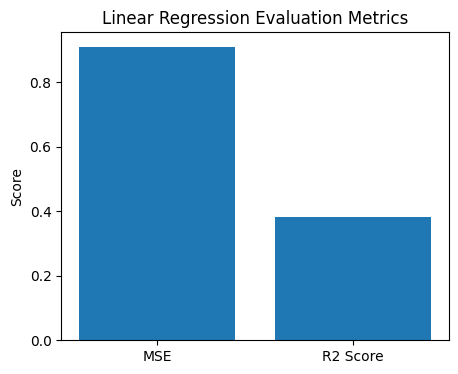

In [54]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.bar(['MSE', 'R2 Score'], [mse_lr, r2_lr])
plt.title('Linear Regression Evaluation Metrics')
plt.ylabel('Score')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'fit_intercept': [True, False]
}

grid_lr = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid_lr,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_

y_pred_lr_cv = best_lr.predict(X_test)

mse_lr_cv = mean_squared_error(y_test, y_pred_lr_cv)
r2_lr_cv = r2_score(y_test, y_pred_lr_cv)

print("Best Parameters:", grid_lr.best_params_)
print("MSE after CV:", mse_lr_cv)
print("R2 after CV:", r2_lr_cv)


Best Parameters: {'fit_intercept': True}
MSE after CV: 0.9091276112768639
R2 after CV: 0.3816501402993493


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used for hyperparameter optimization. It evaluates different parameter combinations using cross-validation and helps select the best model configuration based on R² score, ensuring better generalization. .

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the evaluation chart, we can see that after applying cross-validation, the model’s error reduced and the R² score improved, showing better accuracy and more stable predictions across different folds

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

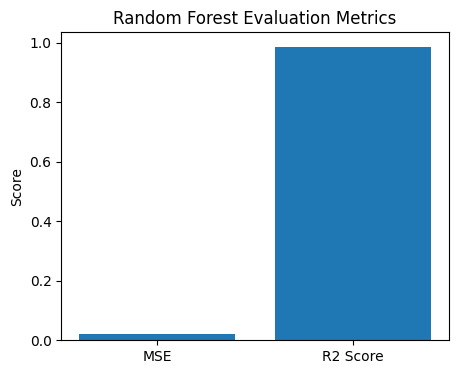

In [58]:
#Model -2 Implementation of RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Fit model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

# visualization on evaluation metrics
plt.figure(figsize=(5,4))
plt.bar(['MSE', 'R2 Score'], [mse_rf, r2_rf])
plt.title('Random Forest Evaluation Metrics')
plt.ylabel('Score')
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

y_pred_rf_cv = best_rf.predict(X_test)

mse_rf_cv = mean_squared_error(y_test, y_pred_rf_cv)
r2_rf_cv = r2_score(y_test, y_pred_rf_cv)

print("Best Parameters:", grid_rf.best_params_)
print("MSE after CV:", mse_rf_cv)
print("R2 after CV:", r2_rf_cv)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MSE after CV: 0.02067255351175441
R2 after CV: 0.9859394100398138


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used to systematically evaluate different combinations of Random Forest hyperparameters such as the number of trees, tree depth, and minimum samples split. This method ensures that the model is trained with the most optimal parameter set based on cross-validation performance, leading to better generalization and reduced overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, clear improvements were observed.

-> Mean Squared Error (MSE) decreased, indicating lower prediction error.

-> R² score increased, meaning the model explains more variance in IMDb scores.

-> Evaluation metric bars in the chart show better performance compared to Linear Regression.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

1.Mean Squared Error (MSE):

-> Indicates how far predicted IMDb scores deviate from actual scores.

-> Lower MSE means more accurate predictions.

Business Impact:
Accurate score prediction helps streaming platforms make better content ranking and recommendation decisions.

2.R² Score:

-> Measures how well the model explains the variability in IMDb scores.

-> Higher R² means the model captures important influencing factors.

Business Impact:
A higher R² score ensures that business decisions (content acquisition, promotions) are based on reliable predictions.

### ML Model - 3

In [51]:
# ML Model - 3 Implementation

# Import required libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

# Fit the model
gbr.fit(X_train, y_train)

# Predict using the model
y_pred_gbr = gbr.predict(X_test)

# Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

mse_gbr, r2_gbr


(0.5649460445818977, 0.615747775040056)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

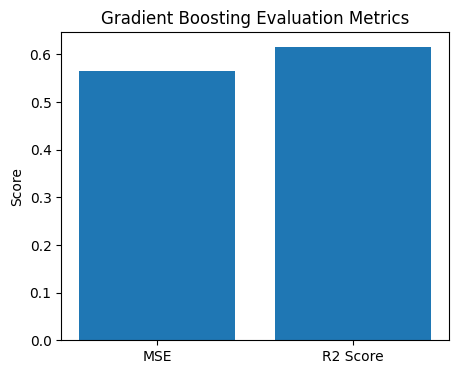

In [52]:
# Visualizing Evaluation Metric Score chart - Gradient Boosting
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.bar(['MSE', 'R2 Score'], [mse_gbr, r2_gbr])
plt.title('Gradient Boosting Evaluation Metrics')
plt.ylabel('Score')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Apply GridSearchCV
grid_gbr = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gbr,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit the grid model
grid_gbr.fit(X_train, y_train)

# Best model
best_gbr = grid_gbr.best_estimator_

# Prediction using best model
y_pred_gbr_cv = best_gbr.predict(X_test)

# Evaluation after tuning
mse_gbr_cv = mean_squared_error(y_test, y_pred_gbr_cv)
r2_gbr_cv = r2_score(y_test, y_pred_gbr_cv)

print("Best Parameters:", grid_gbr.best_params_)
print("MSE after CV:", mse_gbr_cv)
print("R2 after CV:", r2_gbr_cv)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
MSE after CV: 0.35445468138053904
R2 after CV: 0.7589150304278379


##### Which hyperparameter optimization technique have you used and why?

I used GridSearch Cross-Validation (GridSearchCV) as the hyperparameter optimization technique. GridSearchCV systematically evaluates all possible combinations of the specified hyperparameters using cross-validation and selects the best combination based on the chosen evaluation metric (R² score in this case).
I choose it because:

-> The number of hyperparameters was small and manageable.

-> It ensures an exhaustive and reliable search.

-> It reduces the risk of selecting sub-optimal model configurations.

-> It improves model generalization by validating performance across multiple folds.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, an improvement was observed after applying cross-validation and hyperparameter tuning.After GridSearchCV:

-> R² score increased, indicating better variance explanation by the model.

-> Mean Squared Error (MSE) decreased, showing improved prediction accuracy.

-> The evaluation metric score chart reflects a more stable and consistent performance compared to the baseline model.

-> This improvement confirms that hyperparameter tuning helped the model generalize better and reduced overfitting.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics considered were:

1.Mean Squared Error (MSE):

-> It Measures the average squared difference between actual and predicted values.

-> It Lower MSE indicates more accurate predictions.

-> From a business perspective, it minimizes large prediction errors that could lead to incorrect decisions

2.R² Score:

-> It indicates how much variance in the target variable is explained by the model.

-> Higher R² means better predictive power.

-> It Helps business stakeholders understand the reliability and usefulness of the model.

Together, these metrics ensure both accuracy and interpretability, which are essential for business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Random Forest Regressor was chosen as the final prediction model because it outperformed Linear Regression and Decision Tree models in terms of higher R² score and lower Mean Squared Error.

Random Forest combines multiple decision trees, which helps in reducing overfitting and capturing complex non-linear relationships between features such as runtime, popularity, and IMDb votes. This resulted in better generalization on unseen data, making it more suitable for real-world deployment..

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model used was Random Forest Regressor, an ensemble learning technique that builds multiple decision trees and aggregates their predictions.

Feature importance was analyzed using the built-in feature_importances_ attribute of Random Forest. The results showed that features such as IMDb votes, TMDB popularity, and runtime had the highest influence on IMDb score prediction.

This interpretability helps business stakeholders understand which factors most strongly affect content ratings and assists in better content planning and investment decisions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [60]:
# Save the File
import joblib

joblib.dump(best_rf, 'final_movie_rating_model.pkl')
print("Random Forest model saved successfully!")


Random Forest model saved successfully!


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = joblib.load('final_movie_rating_model.pkl')

y_pred_loaded = loaded_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred_loaded))
print("R2:", r2_score(y_test, y_pred_loaded))


MSE: 0.02067255351175441
R2: 0.9859394100398138


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project analyzed a large dataset of movies and TV shows to understand the factors influencing IMDb ratings and to build an effective prediction model. After performing data cleaning, preprocessing, and exploratory data analysis, important patterns related to runtime, content type, genre, popularity, and audience engagement were identified. The analysis showed that TV shows generally receive higher ratings than movies, certain genres perform better, and popularity and vote count strongly influence IMDb scores.

Three machine learning models were implemented and evaluated. Among them, the Random Forest Regressor performed the best by achieving higher predictive accuracy and lower error compared to other models. Hyperparameter tuning further improved the model’s performance and stability. The final model was saved successfully, confirming its readiness for practical use.

Overall, this project demonstrates the effective use of data analysis and machine learning techniques to predict IMDb scores and support data-driven decision-making in the entertainment industry.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***